In [1]:
#Tutorial part 2: https://www.youtube.com/watch?v=wUSDVGivd-8&ab_channel=LukeBarousse

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Job Postings per City in the US

In [3]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Transform a column into a datetime value
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#trabajando en el verdadero data set
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills)

In [4]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

In [5]:
df_plot = df_DA_US.value_counts('job_location').head(25).to_frame()
df_plot

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


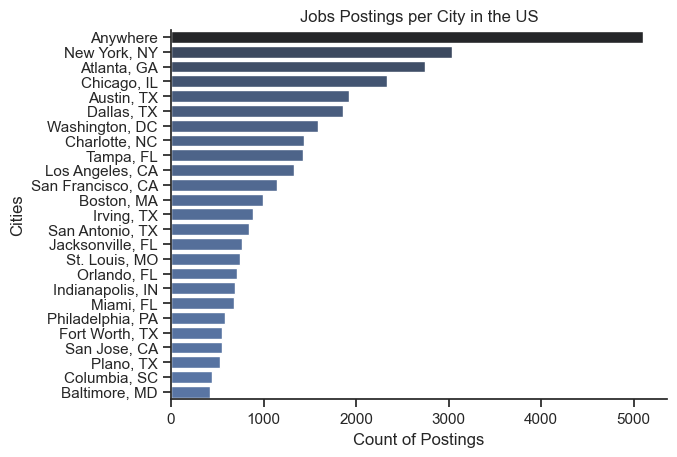

In [6]:
df_plot = df_DA_US.value_counts('job_location').head(25).to_frame()

import seaborn as sns
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location',hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Jobs Postings per City in the US')
plt.xlabel('Count of Postings')
plt.ylabel('Cities')
plt.show()

# Requirements for Data Analyst Positions

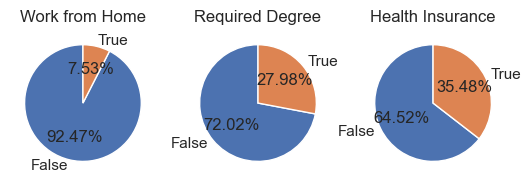

In [7]:
#Tratamos de plotear las tres columnas
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Required Degree',
    'job_health_insurance': 'Health Insurance'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.2lf%%', labels=[False, True]) #es importante usar bien los labels
    ax[i].set_title(title)

# Job Postings per Company in the US

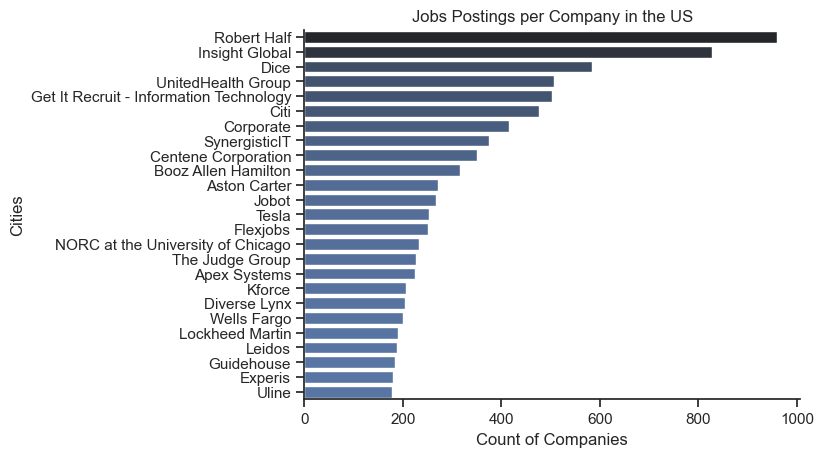

In [102]:
df_plot = df_DA_US.value_counts('company_name').head(25).to_frame()

import seaborn as sns
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name',hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Jobs Postings per Company in the US')
plt.xlabel('Count of Companies')
plt.ylabel('Cities')
plt.show()

# How are in demand skills trending for Data Analysts?

In [85]:
df_skills = df.copy()
df_US = df[df['job_country'] == 'United States'] #acotamos el data set a United States
df_skills = df_US.explode('job_skills') #Explode para trabajar con job_skills
skills_count = df_skills.groupby(['job_skills','job_title_short']).size() #
df_skills_count = skills_count.reset_index(name='skill_count_total')
df_skills_count.sort_values(by='skill_count_total', ascending=False, inplace=True)

In [86]:
df_skills_count.head()

,job_skills,job_title_short,skill_count_total
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022


In [119]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

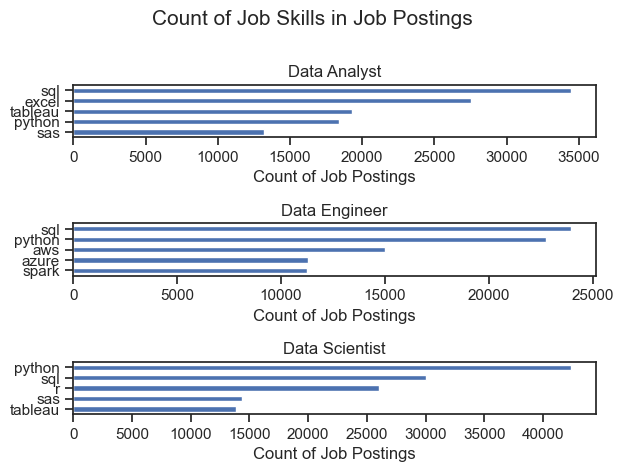

In [120]:
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count_total', ax=ax[i], title=job_title)
    ax[i].invert_yaxis() #sirve para invertir el eje y
    ax[i].set_ylabel('')
    ax[i].set_xlabel('Count of Job Postings')
    ax[i].legend().set_visible(False) #hacer invisible la leyenda dentro del grafico
    

plt.suptitle('Count of Job Skills in Job Postings', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to prevent overlap
plt.show()

In [121]:
#Only get data salaries from the US
df_US = df[(df['job_country'] == 'United States')].copy()
df_US_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total') #reset_index sirve para transformar una serie en dataframe

In [122]:
df_US_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [123]:
#merge de los 2 datasets: df_US_count y df_skills_count
df_skills_percentage = pd.merge(df_skills_count, df_US_count, how='left', on='job_title_short')
df_skills_percentage

,job_skills,job_title_short,skill_count_total,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,vue.js,Business Analyst,1,7382
1866,arch,Business Analyst,1,7382
1867,asana,Machine Learning Engineer,1,921
1868,no-sql,Machine Learning Engineer,1,921


In [124]:
df_skills_percentage['skill_percentage'] = df_skills_percentage['skill_count_total'] / df_skills_percentage['jobs_total']*100

In [125]:
df_skills_percentage

,job_skills,job_title_short,skill_count_total,jobs_total,skill_percentage
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


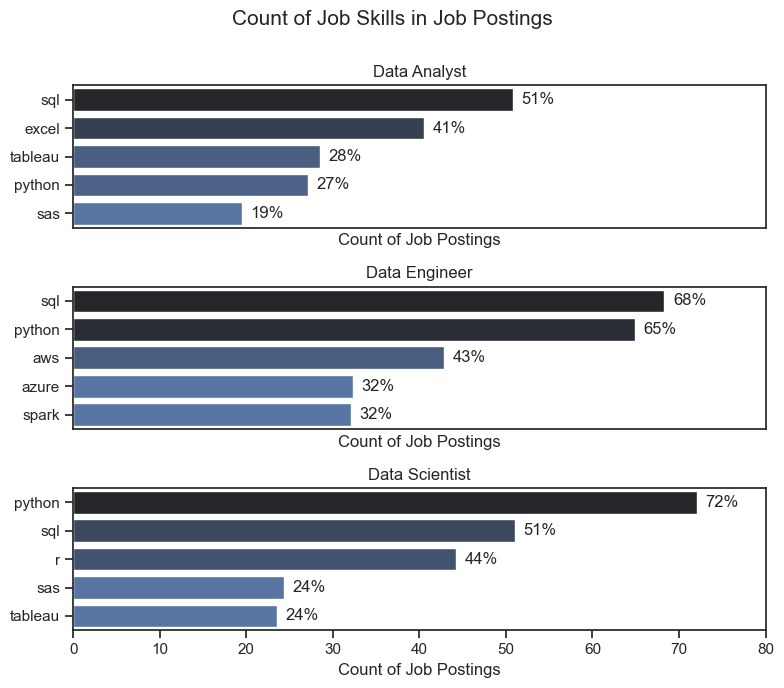

In [141]:
fig, ax = plt.subplots(3,1, figsize=(8,7))

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percentage[df_skills_percentage['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percentage', y='job_skills', ax=ax[i], hue='skill_count_total', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('Count of Job Postings')
    ax[i].legend().set_visible(False) #hacer invisible la leyenda dentro del grafico
    ax[i].set_xlim(0, 80) #Delimitamos el eje x, para que sea identico en todos los graficos

    #Ploting the percentage
    for n, v in enumerate(df_plot['skill_percentage']):
        ax[i].text(v + 1,n, f'{v:.0f}%', va='center')

    #De esta forma eliminamos los x_ticks en los 2 primeros graficos y lo dejamos en el ultimo
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

plt.suptitle('Count of Job Skills in Job Postings', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to prevent overlap
plt.show()